read data

In [34]:
import pandas as pd
from pathlib import Path
import os

directory = Path(os.getcwd())   
directory = directory.parent.parent.joinpath("data") 
df = pd.read_pickle(directory.joinpath("stocktwits_processed_without_multiple_full.pkl"))
df

,id,text,time,sentiment,symbols
0,411896118,I’m comfortable at $127.50. I’ll check back in...,1638291431,Bullish,$BABA
1,411895020,how low does this POS go tomorrow is the milli...,1638291222,,$BABA
2,411894156,@Nobrainer6868 started my first 5% position t...,1638291057,,$BABA
3,411894124,You guys want me to sell down here? Look at th...,1638291050,,$BABA
4,411893846,at this price point shorts are better off flip...,1638291000,,$BABA
...,...,...,...,...,...
386926,420618061,USBancorp BidaskScore is #Reiterated to Stron...,1640479505,,$USB
386927,420617596,Short sale volume (not short interest) for on...,1640478214,,$USB
386928,420610698,SweepCast observed: with Unusual Options Acti...,1640466364,,$USB
386929,420437859,How does this affect your portfolio? 's in Upt...,1640326224,,$USB


Date Distrubtion

In [37]:
df.text.sample(20)

12239             $252 has a long exciting climb from here!
250122                                      love the run :)
366875    Whew I almost took a loss on my puts when it h...
90285          I'm going to change my name up to the oracle
211390              do you think TikTok ends up killing fb?
326834    Cash ready! Current investments only in profit...
75309     just hurry and reach the $164.53 gap fill so I...
97881                      $172.22 is all I want for today.
86705                                     cue the war drums
361385    hope this doesn't moon too much because I need...
170558    if you haven't made your bed this morning you'...
335060    Investing after you understand the fundamental...
220799    [15s. delayed]: Issued Press Release on Decemb...
206618                                           just awful
63174     weeeeeeeeeee.....hope i don't jinx this bad bo...
322182                watch them run this up into the close
165632                                  

<AxesSubplot:>

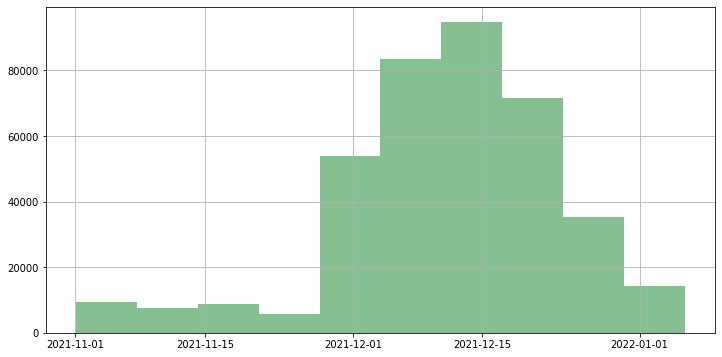

In [2]:
import datetime
df['time'] = [datetime.datetime.fromtimestamp(date) for date in df['time']]
df.time.hist(figsize=(12,6),color='#86bf91')

Stocks distribution

In [3]:
df['symbols'].value_counts()

$BTC.X    91605
$TSLA     57125
$AAPL     35193
$QQQ      30181
$BABA     29410
$NVDA     16962
$AMZN     10691
$NFLX      9999
$QCOM      8923
$JD        7755
$PYPL      7588
$TSM       7322
$GOOGL     7292
$FB        6646
$DIS       6444
$JPM       6311
$MS        4922
$MSFT      4294
$SBUX      4050
$JNJ       3956
$GS        3600
$TWTR      3392
$INTC      2481
$KO        2217
$ORCL      2164
$WMT       1836
$BTC       1717
$EBAY      1450
$BAC       1371
$C         1323
$V         1320
$SPY       1172
$XOM       1114
$MA         917
$USB        696
$HSBC       665
$UNH        383
$UBS        271
$DWAC       118
Name: symbols, dtype: int64

In [4]:
# remove value counts only have less or equal four
df = df.groupby('symbols').filter(lambda x : len(x)>500)
df['symbols'].value_counts()

$BTC.X    91605
$TSLA     57125
$AAPL     35193
$QQQ      30181
$BABA     29410
$NVDA     16962
$AMZN     10691
$NFLX      9999
$QCOM      8923
$JD        7755
$PYPL      7588
$TSM       7322
$GOOGL     7292
$FB        6646
$DIS       6444
$JPM       6311
$MS        4922
$MSFT      4294
$SBUX      4050
$JNJ       3956
$GS        3600
$TWTR      3392
$INTC      2481
$KO        2217
$ORCL      2164
$WMT       1836
$BTC       1717
$EBAY      1450
$BAC       1371
$C         1323
$V         1320
$SPY       1172
$XOM       1114
$MA         917
$USB        696
$HSBC       665
Name: symbols, dtype: int64

<AxesSubplot:>

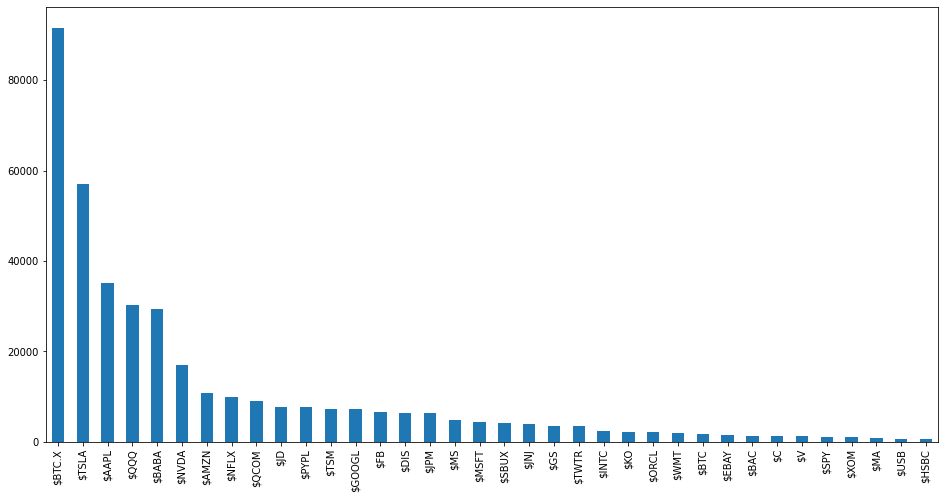

In [5]:
df['symbols'].value_counts().plot(kind='bar', figsize=(16, 8), fontsize=10)


WordCloud Generation

In [28]:
### compare different stocks
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

'''
given the column of adataframe, display the word cloud
'''
def show_wordcloud(column):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    for val in column:
        # split the value
        tokens = val.split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10,
                    max_words=100).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


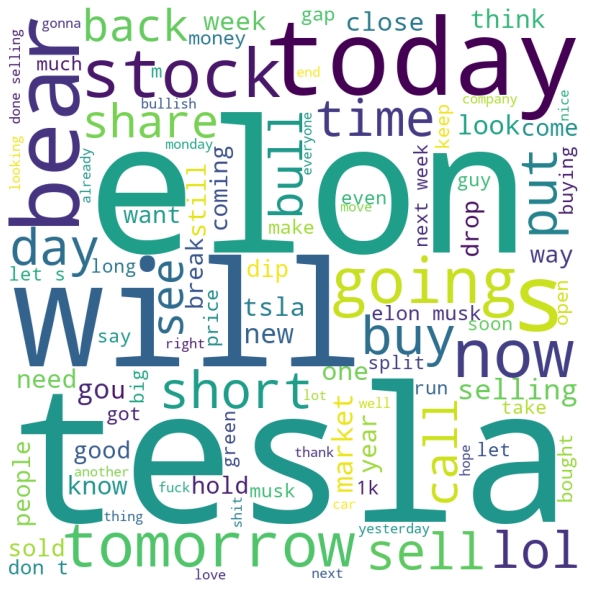

In [29]:
# BTC
show_wordcloud(df[df['symbols']=="$TSLA"]['text'])

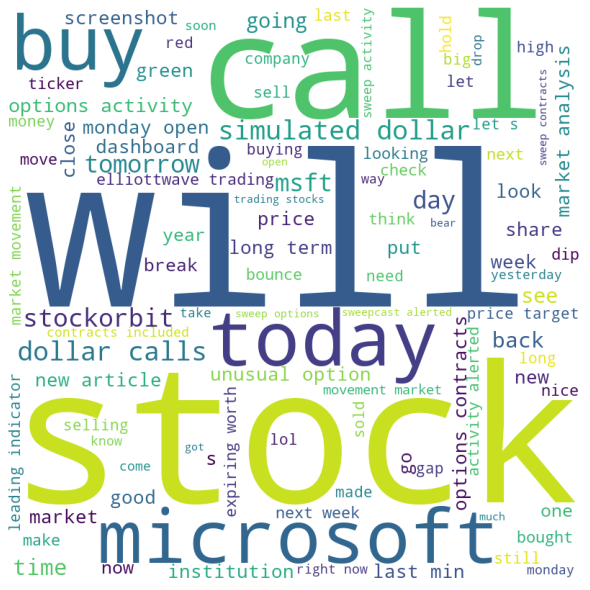

In [32]:
# AAPL
show_wordcloud(df[df['symbols']=="$MSFT"]['text'])

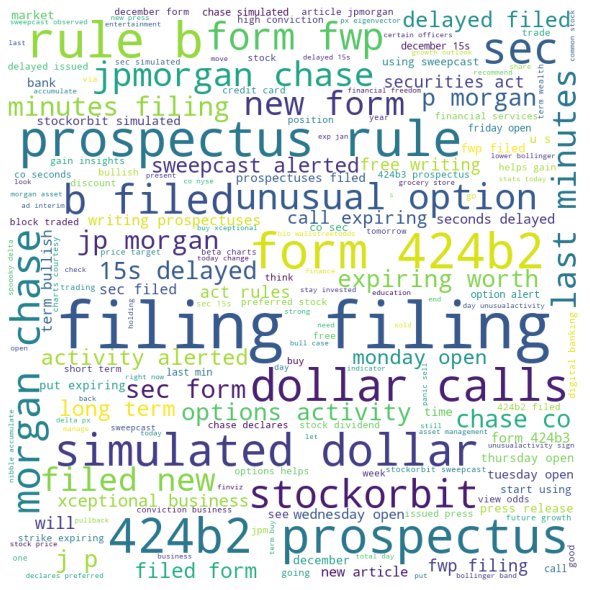

In [9]:
# JPM
show_wordcloud(df[df['symbols']=="$JPM"]['text'])

from wordcloud: too many common words

Digging deep to tf-idf (+stopwords?)

In [10]:
# creating the document of MSFT
MSFT_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$MSFT'].text)])
MSFT_corpus = MSFT_corpus.replace('\n','')
MSFT_corpus[:100]

'Fed is going to be more aggressive with their timeline, this looks like a rug pull is incoming. $spy'

In [11]:
# creating the document of AAPL
AAPL_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$AAPL'].text)])
AAPL_corpus = AAPL_corpus.replace('\n','')
AAPL_corpus[:100]

'time to rotate out for awhile $jpm $bac etc…. @Swingtrader9 @Johnnynumba5 dude buy shit like $msft. '

In [12]:
# creating the document of FB
FB_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$FB'].text)])
FB_corpus = FB_corpus.replace('\n','')
FB_corpus[:100]

'follows $msft price action for a while now. More than $ 100 million worth of metaverse land was sold'

In [13]:
# creating the document of JPM
JPM_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$JPM'].text)])
JPM_corpus = JPM_corpus.replace('\n','')
JPM_corpus[:100]

'please move, pos, you suppose to cover my loss in amd $bac. [15s. delayed] filed form FWP on Novembe'

In [23]:
# creating the document of JPM
TSLA_corpus = ". ".join([i.strip() for i in list(df[df['symbols']=='$TSLA'].text)])
TSLA_corpus = TSLA_corpus.replace('\n','')
TSLA_corpus[:100]

'from richest man in the world  To then a full-time influencer?? Lol  Does he realize.. he’d be essen'

In [24]:
corpus = [MSFT_corpus, AAPL_corpus, JPM_corpus, FB_corpus,TSLA_corpus]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# words to vector
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus) # fit corpus
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
# a dataframe with tf-idf scores
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
data = df_tfidf.transpose()
data.columns = ['MSFT', 'AAPL', 'JPM', 'FB','TSLA']
data.head()

,MSFT,AAPL,JPM,FB,TSLA
00,0.039223,0.027033,0.019290,0.034837,0.024447
000,0.010931,0.008981,0.017562,0.008945,0.028981
000000,0.000000,0.000192,0.000000,0.000000,0.000000
0000000,0.000000,0.000000,0.000000,0.000988,0.000000
0000000000,0.000000,0.000000,0.000000,0.000000,0.000129


In [30]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud_tfidf(ind):
    # sort values and only store top 100 
    df = data.sort_values(by=[ind], ascending=False)
    df = df.iloc[:100]
    print(df.iloc[:20])
    # generate wordcloud
    wordcloud = WordCloud(background_color="white", width=800, height=800, max_words=100).generate_from_frequencies(df[ind])
    # set the figsize
    plt.figure(figsize=[12,6])
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

              MSFT      AAPL       JPM        FB      TSLA
elon      0.000643  0.002566  0.000864  0.003766  0.357701
tesla     0.001929  0.010630  0.000864  0.003766  0.316772
today     0.152391  0.171089  0.023033  0.161473  0.210650
just      0.086805  0.175854  0.013676  0.156295  0.178115
selling   0.036008  0.035922  0.002447  0.033425  0.175848
stock     0.131815  0.135625  0.043474  0.199605  0.159244
buy       0.145961  0.175212  0.044338  0.165710  0.151034
going     0.083590  0.147171  0.012812  0.100274  0.137983
like      0.099665  0.138007  0.009069  0.135110  0.134980
market    0.185827  0.189508  0.032390  0.175126  0.133571
shares    0.055298  0.066529  0.012380  0.043781  0.129466
bears     0.019290  0.168339  0.001296  0.032954  0.126893
sell      0.053369  0.083391  0.017706  0.052726  0.123829
time      0.092592  0.115647  0.027639  0.095095  0.120092
day       0.109953  0.114823  0.023320  0.110630  0.119234
tomorrow  0.113168  0.114823  0.009645  0.087563  0.1188

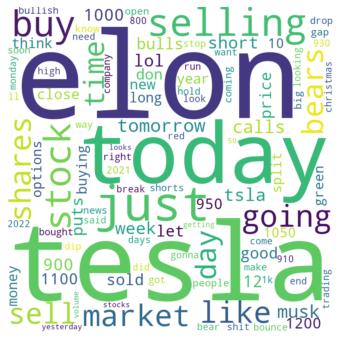

In [31]:
wordcloud_tfidf("TSLA")

                MSFT      AAPL       JPM        FB      TSLA
microsoft   0.326901  0.003250  0.000000  0.003896  0.000724
calls       0.259130  0.178328  0.129126  0.194427  0.112249
options     0.192901  0.062039  0.077735  0.129461  0.062374
market      0.185827  0.189508  0.032390  0.175126  0.133571
open        0.165894  0.056083  0.121929  0.092741  0.053122
today       0.152391  0.171089  0.023033  0.161473  0.210650
buy         0.145961  0.175212  0.044338  0.165710  0.151034
dollar      0.144032  0.024009  0.119769  0.078147  0.017340
stocks      0.144032  0.050951  0.023608  0.080031  0.033209
msft        0.142746  0.005865  0.000864  0.010357  0.002022
trading     0.142103  0.054341  0.014683  0.132756  0.040562
stockorbit  0.140174  0.013196  0.117466  0.072498  0.009926
simulated   0.140174  0.013196  0.117466  0.072969  0.009926
12          0.136316  0.076610  0.040595  0.072969  0.093255
stock       0.131815  0.135625  0.043474  0.199605  0.159244
tomorrow    0.113168  0.

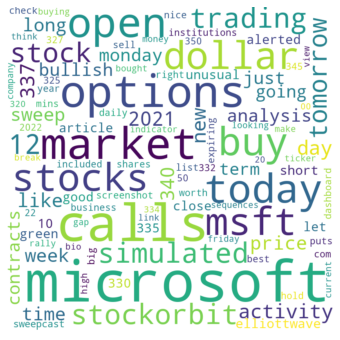

In [33]:
wordcloud_tfidf("MSFT")

              MSFT      AAPL       JPM        FB
apple     0.010964  0.455829  0.000000  0.034110
market    0.185030  0.187559  0.033256  0.172903
calls     0.258017  0.176494  0.132582  0.191959
just      0.086433  0.174046  0.014042  0.154311
buy       0.145335  0.173411  0.045524  0.163607
today     0.151737  0.169329  0.023649  0.159424
bears     0.019207  0.166609  0.001330  0.032535
puts      0.051219  0.159262  0.003400  0.080874
going     0.083231  0.145658  0.013155  0.099001
like      0.099237  0.136588  0.009312  0.133395
stock     0.131250  0.134230  0.044637  0.197072
aapl      0.025610  0.130149  0.001626  0.014873
180       0.002349  0.123359  0.003435  0.000000
week      0.090914  0.120898  0.013303  0.107832
time      0.092195  0.114458  0.028379  0.093888
tomorrow  0.112683  0.113642  0.009903  0.086451
day       0.109481  0.113642  0.023945  0.109226
200       0.006402  0.108200  0.004286  0.014409
short     0.076189  0.104300  0.026753  0.048803
177       0.000000  

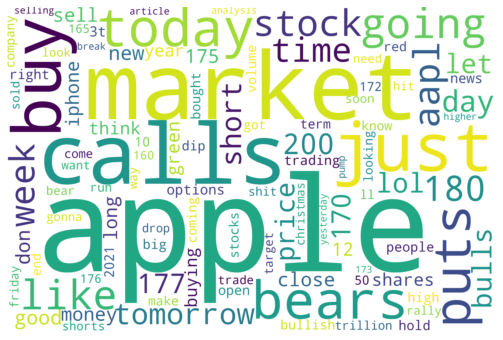

In [21]:
wordcloud_tfidf("AAPL")

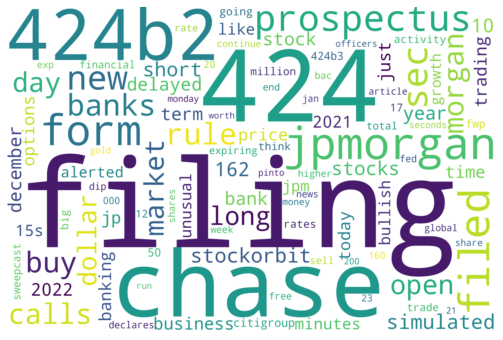

In [ ]:
wordcloud_tfidf("JPM")

show word frequencies

In [ ]:
from collections import Counter
from nltk import ngrams

counted = Counter(corpus)
counted_2= Counter(ngrams(corpus, 2))

word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)

In [ ]:
word_freq

,word,frequency
13,market,486
54,microsoft,365
1142,calls,323
223,stocks,320
194,like,301
...,...,...
5018,chewy,1
5019,staffing,1
5020,hundreds,1
5022,dodge,1


<AxesSubplot:xlabel='frequency', ylabel='pairs'>

C:\Users\samue\anaconda3\envs\jpm\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10687 (\N{CIRCLED BULLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\samue\anaconda3\envs\jpm\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


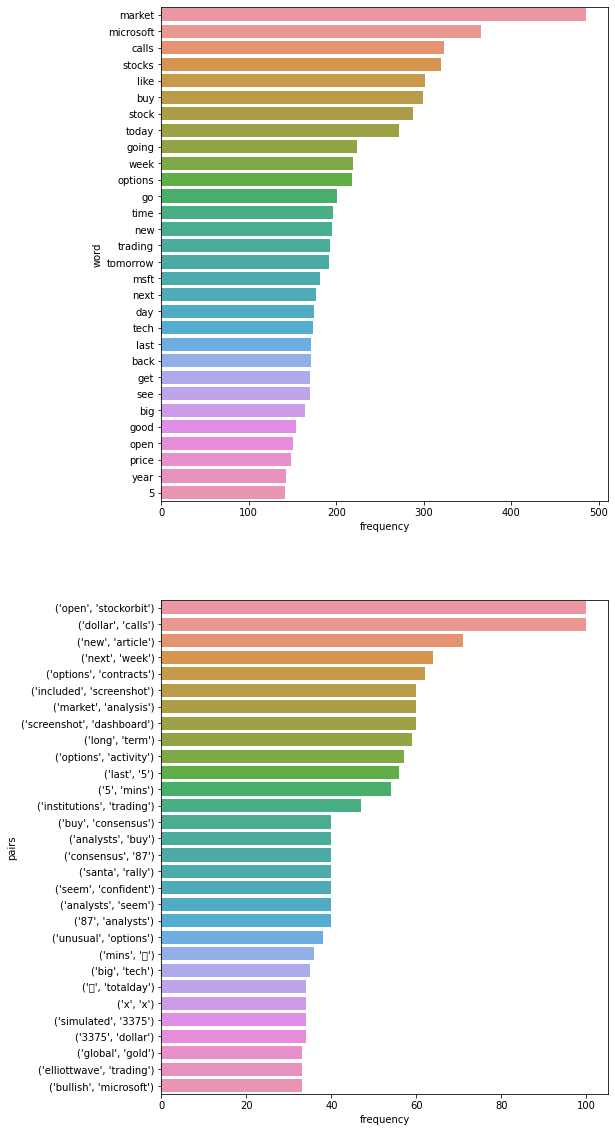

In [ ]:
import seaborn as sns
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))

print out unique words of tf-idf

In [ ]:
MSFT_lst = list(data.sort_values(by=['MSFT'], ascending=False).iloc[:100].index)
AAPL_lst = list(data.sort_values(by=['AAPL'], ascending=False).iloc[:100].index)
FB_lst = list(data.sort_values(by=['FB'], ascending=False).iloc[:100].index)
JPM_lst = list(data.sort_values(by=['JPM'], ascending=False).iloc[:100].index)


In [ ]:
set(MSFT_lst) - set(MSFT_lst).intersection(set(AAPL_lst)) - set(MSFT_lst).intersection(set(FB_lst)) - set(MSFT_lst).intersection(set(JPM_lst))

{'22',
 '325',
 '335',
 'analysts',
 'best',
 'better',
 'cap',
 'companies',
 'institutions',
 'list',
 'microsoft',
 'msft',
 'nasdaq',
 'nice',
 'nuance',
 'video'}

In [ ]:
set(AAPL_lst) - set(AAPL_lst).intersection(set(MSFT_lst)) - set(AAPL_lst).intersection(set(FB_lst)) - set(AAPL_lst).intersection(set(JPM_lst))

{'170',
 '172',
 '173',
 '175',
 '180',
 '200',
 'aapl',
 'bear',
 'bears',
 'biden',
 'bought',
 'bounce',
 'bulls',
 'christmas',
 'come',
 'drop',
 'omicron',
 'really',
 'red',
 'say',
 'selling',
 'shit',
 'soon',
 'volume',
 'want',
 'watch',
 'yesterday'}

In [ ]:
set(FB_lst) - set(FB_lst).intersection(set(MSFT_lst)) - set(FB_lst).intersection(set(AAPL_lst)) - set(FB_lst).intersection(set(JPM_lst))

{'300',
 '332',
 '350',
 '400',
 'break',
 'elliottwave',
 'facebook',
 'fb',
 'glasses',
 'gonna',
 'instagram',
 'low',
 'meta',
 'nio',
 'platforms',
 'play',
 'presented',
 'social',
 'strong',
 'vr',
 'whatsapp'}

In [ ]:
set(JPM_lst) - set(JPM_lst).intersection(set(MSFT_lst)) - set(JPM_lst).intersection(set(AAPL_lst)) - set(JPM_lst).intersection(set(FB_lst))

{'000',
 '15s',
 '160',
 '162',
 '17',
 '424',
 '424b2',
 '424b3',
 'alerted',
 'bac',
 'bank',
 'banking',
 'banks',
 'chase',
 'citigroup',
 'continue',
 'declares',
 'delayed',
 'expiring',
 'filed',
 'filing',
 'financial',
 'form',
 'fwp',
 'higher',
 'jan',
 'jp',
 'jpm',
 'jpmorgan',
 'million',
 'minutes',
 'morgan',
 'officers',
 'pinto',
 'prospectus',
 'rate',
 'rates',
 'rule',
 'sec',
 'seconds',
 'share',
 'sweepcast',
 'unusual'}

try on 20 companies of this approach

In [ ]:
corpus = []
for ind in df.symbols.value_counts()[:20].index:
    corpus.append(". ".join([i.strip() for i in list(df[df['symbols'] == ind].text)]).replace('\n',''))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# words to vector
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus) # fit corpus
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
# a dataframe with tf-idf scores
df_tfidf = pd.DataFrame(lst1, columns=feature_names)
data = df_tfidf.transpose()
data.columns = df.symbols.value_counts()[:20].index
data.head()

,$TSLA,$AAPL,$FB,$PYPL,$MSFT,$SPY,$BAC,$JPM,$JD,$V,$QQQ,$AMZN,$NVDA,$MS,$BABA,$GS,$NIO,$AMD,$LCID,$KO
00,0.022185,0.020330,0.026322,0.018852,0.02432,0.005878,0.025600,0.020418,0.015049,0.058825,0.005664,0.002083,0.004656,0.018266,0.005101,0.089802,0.026427,0.003460,0.032692,0.022179
000,0.040322,0.019723,0.018986,0.023565,0.01639,0.012596,0.041183,0.026135,0.011287,0.012032,0.011327,0.020833,0.018622,0.002491,0.013603,0.062541,0.105707,0.010379,0.070054,0.009505
000000,0.000000,0.001017,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000000,0.000000,0.000000,0.001446,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000019617,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.010948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
data

,$TSLA,$AAPL,$FB,$PYPL,$MSFT,$SPY,$BAC,$JPM,$JD,$V,$QQQ,$AMZN,$NVDA,$MS,$BABA,$GS,$NIO,$AMD,$LCID,$KO
00,0.022185,0.020330,0.026322,0.018852,0.024320,0.005878,0.025600,0.020418,0.015049,0.058825,0.005664,0.002083,0.004656,0.018266,0.005101,0.089802,0.026427,0.003460,0.032692,0.022179
000,0.040322,0.019723,0.018986,0.023565,0.016390,0.012596,0.041183,0.026135,0.011287,0.012032,0.011327,0.020833,0.018622,0.002491,0.013603,0.062541,0.105707,0.010379,0.070054,0.009505
000000,0.000000,0.001017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000000,0.000000,0.000000,0.001446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0000019617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
英特尔ceo基辛格周四表示,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
阿里的估值低得可笑,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
阿里系中小电商全部彻查补缴税款,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003694,0.000000,0.000000,0.000000,0.000000,0.000000,0.005009,0.000000,0.000000,0.000000,0.000000,0.000000
𝗙𝗥𝗘𝗘,0.000000,0.000894,0.000000,0.000000,0.001558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def get_wordlist(data, symbol, length):
    return list(data.sort_values(by=[symbol], ascending=False).iloc[:length].index)

def remove_duplicate(data, cur_sym, length):
    word_list = get_wordlist(data, cur_sym, length)
    others = list(set(data.columns) - {cur_sym})
    for other in others:
        word_list = list(set(word_list) - set(get_wordlist(data, other, length)))
    return word_list

for i in data.columns:
    print(i, '\t',remove_duplicate(data, i, 50))

$TSLA 	 ['900', 'sold', '1200', 'tsla', 'musk', '930', '1000']
$AAPL 	 ['180', '175', '170', '173', 'yesterday', 'apple', '172']
$FB 	 ['instagram', 'facebook', 'fb', 'meta', 'platforms']
$PYPL 	 ['200', '187', 'fintech', '185', 'paypal', 'target', 'pypl', '22', 'gap', '192', '195', 'amen', 'hold', '190']
$MSFT 	 ['microsoft', 'nuance']
$SPY 	 ['covid', 'win', 'spy', 'went', 'christmas', 'gonna']
$BAC 	 ['44', 'included', 'rate', 'financials', 'monday', 'dashboard', 'america', 'rates', 'screenshot', 'urgently', '45']
$JPM 	 ['jp', 'jpm', '162', '424b3', '424', 'chase', 'banking', 'prospectus', 'rule']
$JD 	 ['hsi', 'days']
$V 	 ['digital', 'women', 'card', 'advisory', 'payment', 'press', 'visa', 'payments', 'crypto', '220', 'introduces', 'xceptional', 'spending', 'navigate', 'services', 'currencycloud', 'football']
$QQQ 	 ['uranium', 'crash', 'print', 'cruise', 'way', 'bear', 'urnm', 'sprott']
$AMZN 	 ['hd', 'exela', 'verb', 'soon', 'bezos', 'amazon', 'global', 'unh']
$NVDA 	 ['growth'

In [ ]:
cur_sym = '$TSLA'
set(data.columns) - set(cur_sym)
{cur_sym}

{'$TSLA'}